# Portfolio Project Walkthrough(Kaggle Titanic)

In [160]:
# importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Titanic dataset
data=pd.read_csv('train (1).csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Basic Checks

In [5]:
data.shape

(891, 12)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Filtering Data

In [25]:
data.loc[0:2,['Name','Pclass']]

,Name,Pclass
0,"Braund, Mr. Owen Harris",3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",3


In [27]:
data.iloc[1:4,[0,2,6]] 

,PassengerId,Pclass,SibSp
1,2,1,1
2,3,3,0
3,4,1,1


In [29]:
data.loc[(data['Sex']=='male') & (data['Age']>40)].shape

(102, 12)

In [31]:
data.loc[(data['Sex']=='female') & (data['Pclass']==1)].shape

(94, 12)

In [33]:
data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Data preprocessing

In [36]:
# finding missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
data.duplicated().sum()

0

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
num_col=data.select_dtypes(include=['int64','float64']).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

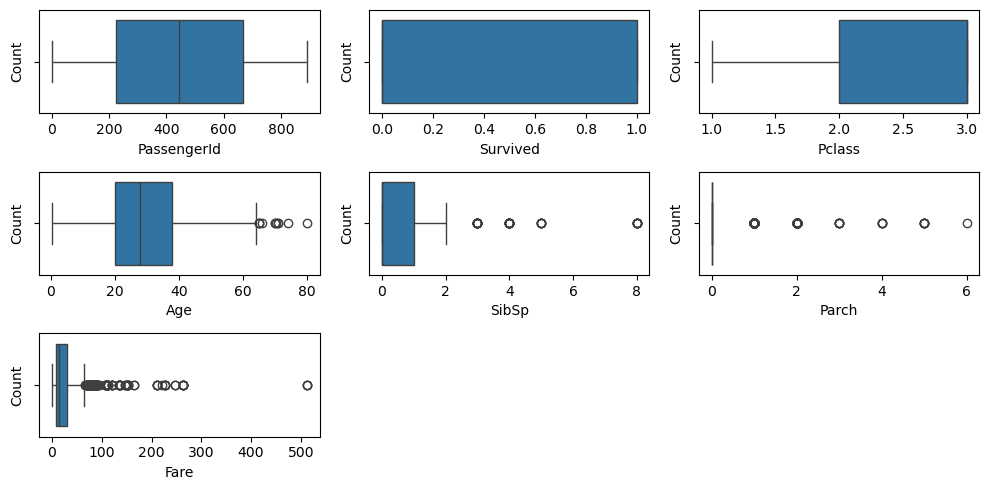

In [44]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [45]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [48]:
## Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age','SibSp','Parch']]=scale.fit_transform(data[['Age','SibSp','Parch']])



In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,8.0500,NaN,S


In [52]:
#Handling the categorical data
data1=data.copy()

In [54]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.000000,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.000000,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.000000,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.000000,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.000,0.000000,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0.000,0.000000,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0.000,0.000000,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,0.125,0.333333,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0.000,0.000000,111369,30.0000,C148,C


## Handle missing values 

In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
len(data)

891

In [61]:
#checking percentage of missing value for Age
177/891*100

19.865319865319865

In [63]:
#checking percentage of missing value for Cabin
687/891*100

77.10437710437711

In [65]:
## How much values have been missed
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [67]:
## For age coloumn
data.Age.dtypes

dtype('float64')

In [69]:
data.Age.value_counts()

Age
0.296306    30
0.271174    27
0.220910    26
0.233476    25
0.346569    25
            ..
0.453380     1
0.692134     1
0.006283     1
0.290023     1
0.924604     1
Name: count, Length: 88, dtype: int64

In [71]:
data['Age'].mode()

0    0.296306
Name: Age, dtype: float64

In [73]:
## Getting the rows where values are missed in Age features
data.loc[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0.000,0.000000,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0.000,0.000000,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0.000,0.000000,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0.000,0.000000,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0.000,0.000000,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0.000,0.000000,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,1.000,0.333333,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0.000,0.000000,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0.000,0.000000,349217,7.8958,NaN,S


In [75]:
## Imputing the missing values with mode
data.loc[data['Age'].isnull()==True,'Age']='0.29'

In [77]:
data.Age.isnull().sum()

0

<Axes: xlabel='Age', ylabel='count'>

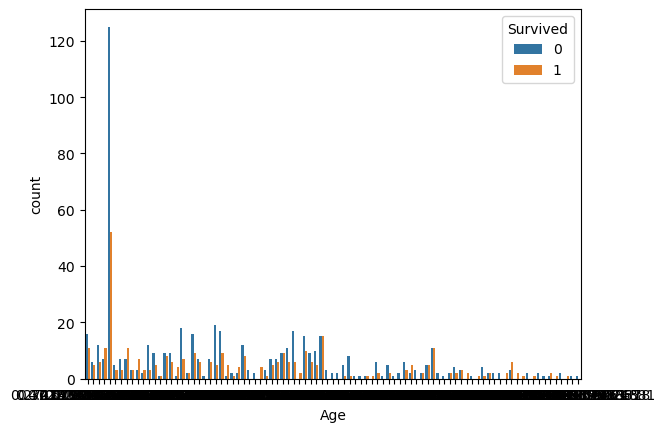

In [79]:
sns.countplot(data=data,x='Age',hue='Survived')

In [80]:
## Handling missing value for cabin
data.Cabin.dtypes

dtype('O')

In [83]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [85]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [87]:
## Getting the rows where values are missed in Cabin features
data.loc[data['Cabin'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.000000,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.000000,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.000,0.000000,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0.29,0.000,0.000000,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.019854,0.375,0.166667,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,0.308872,0.000,0.000000,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,0.484795,0.000,0.833333,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0.000,0.000000,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.29,0.125,0.333333,W./C. 6607,23.4500,NaN,S


In [89]:
## Imputing the missing values with mode
data.loc[data['Cabin'].isnull()==True,'Cabin']='B96 ,B98,C23,C25,C27,G6'

In [91]:
data.Cabin.isnull().sum()

0

## Visualize data

In [94]:
data.shape

(891, 12)

<Axes: xlabel='Sex', ylabel='count'>

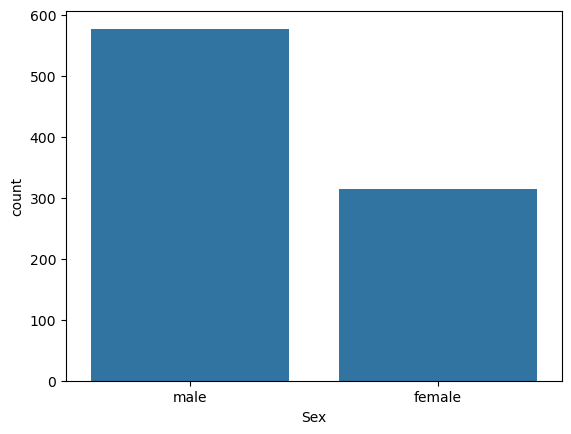

In [96]:
# Univariate analysis
sns.countplot(x='Sex',data=data)

In [98]:
# Create dataframe which includes categorical data
data1=data[['Survived','Pclass','Name','Sex','Cabin','Embarked']]
# Create dataframe which includes numerical data
data2=data[['PassengerId','Age','Parch','Fare']]

In [100]:
data1.head()

,Survived,Pclass,Name,Sex,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,"B96 ,B98,C23,C25,C27,G6",S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,"B96 ,B98,C23,C25,C27,G6",S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,3,"Allen, Mr. William Henry",male,"B96 ,B98,C23,C25,C27,G6",S


In [102]:
data2.head()

,PassengerId,Age,Parch,Fare
0,1,0.271174,0.0,7.2500
1,2,0.472229,0.0,71.2833
2,3,0.321438,0.0,7.9250
3,4,0.434531,0.0,53.1000
4,5,0.434531,0.0,8.0500


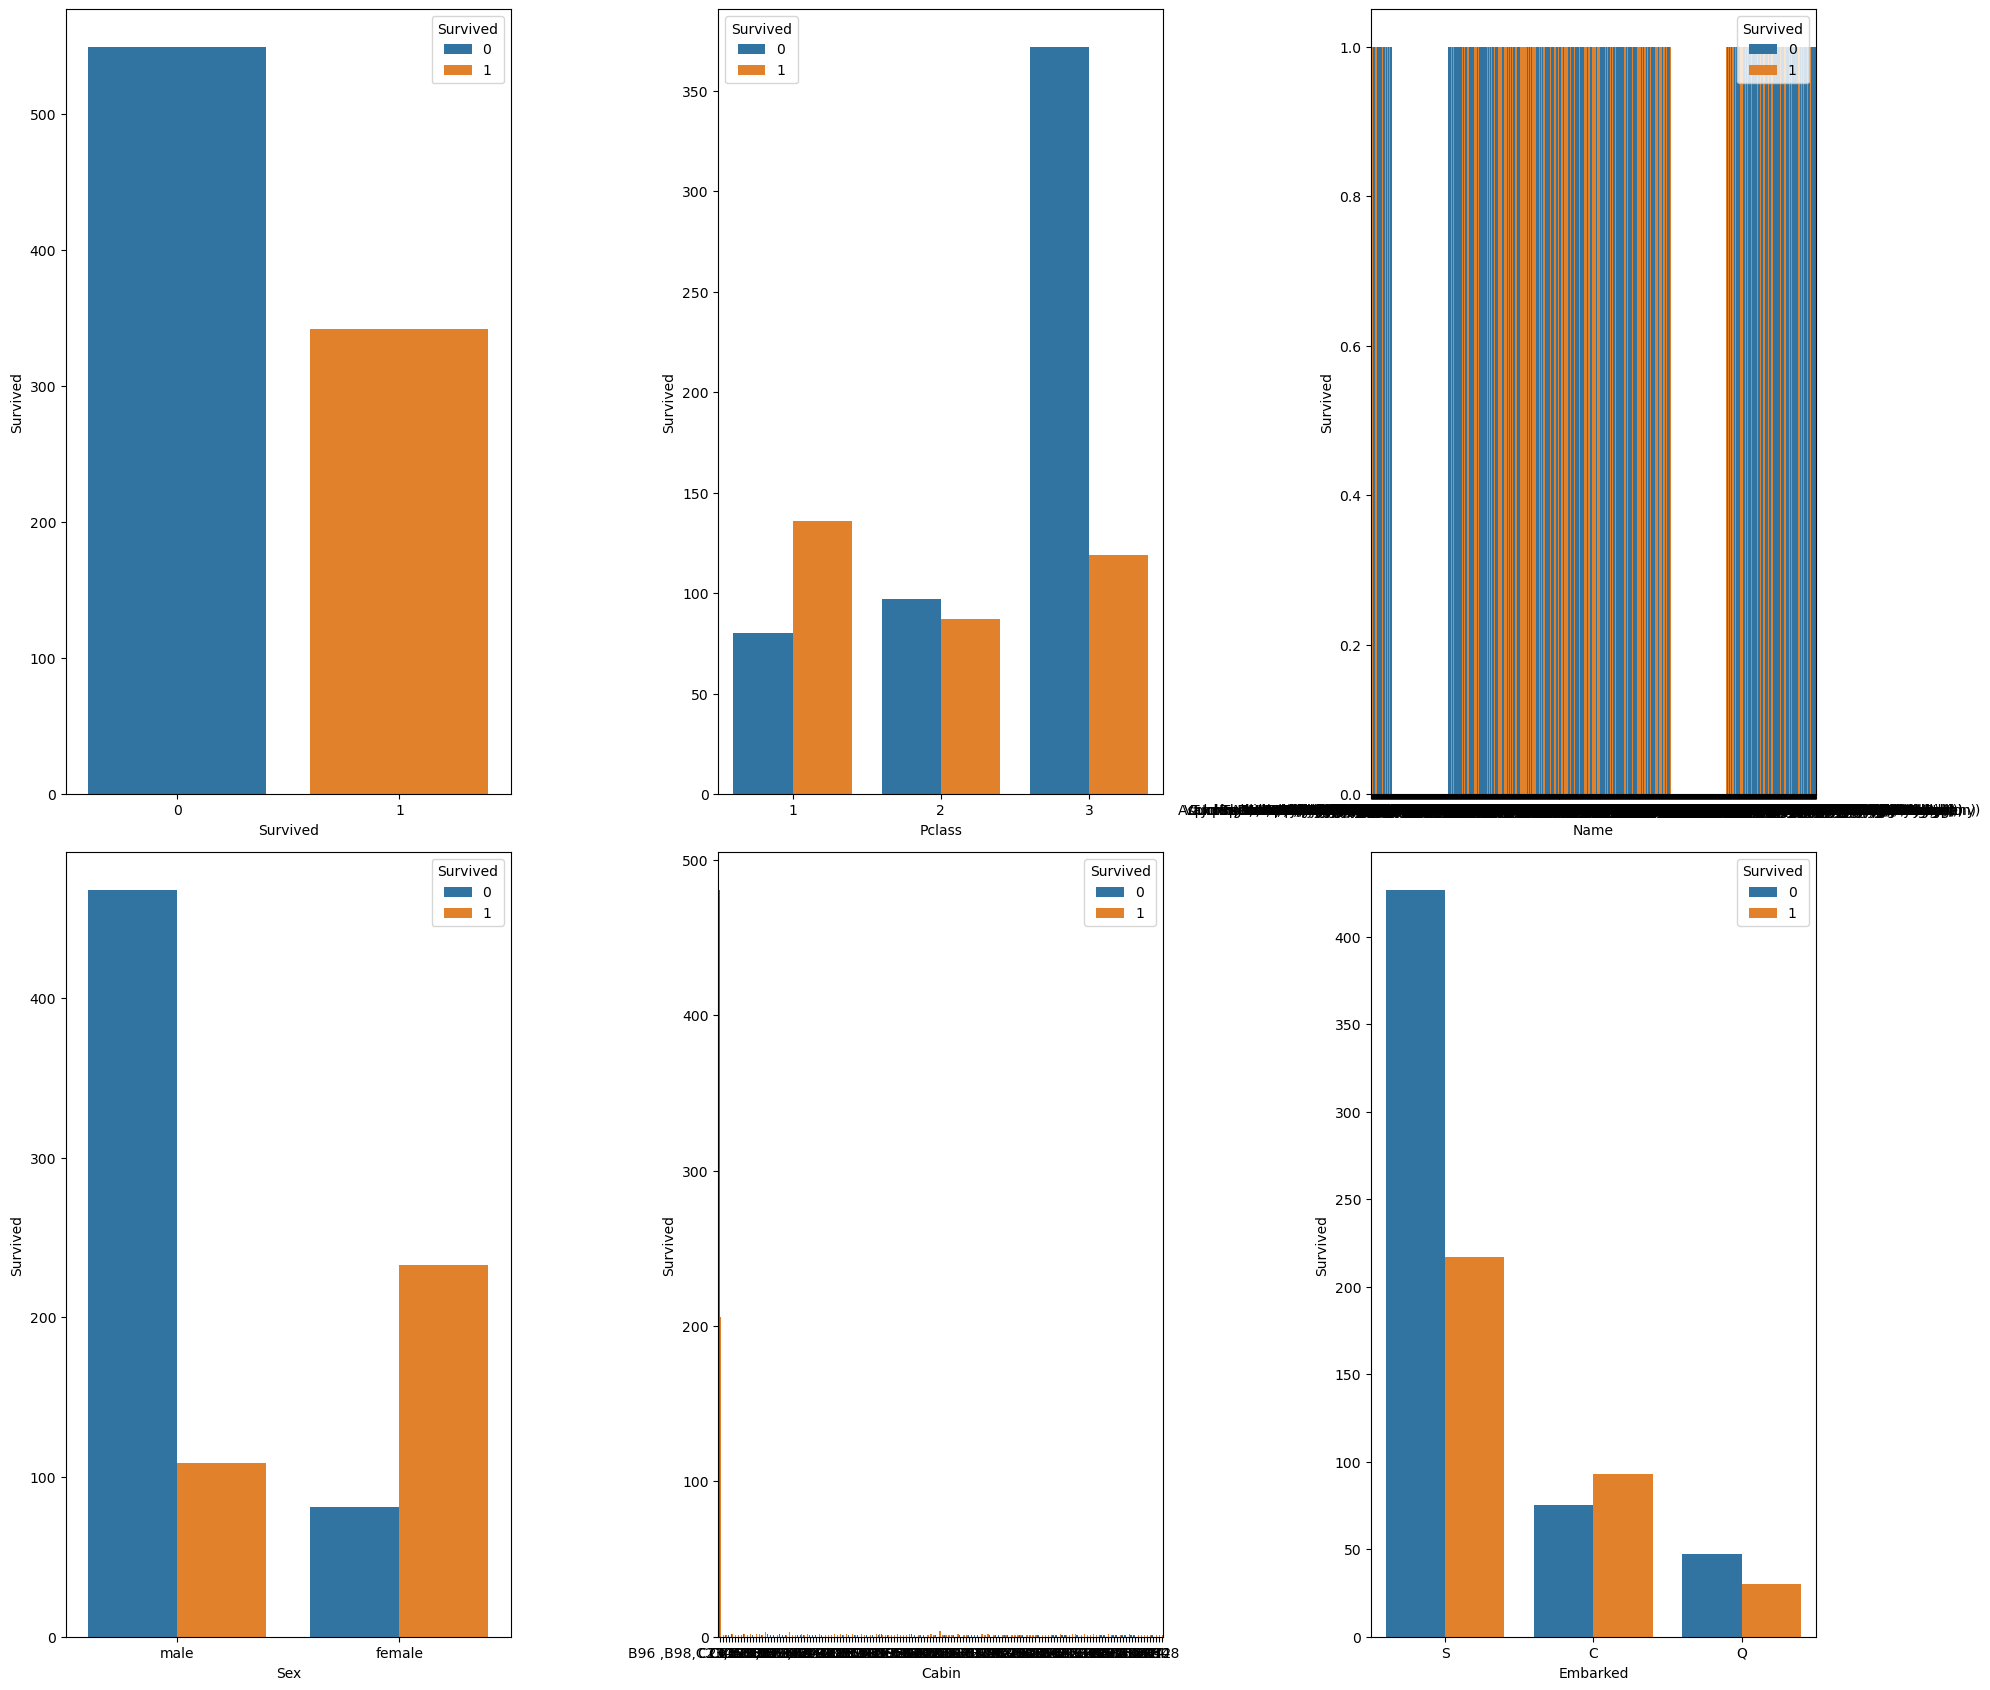

In [104]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the categorical columns
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column],hue=data['Survived'])
        plt.xlabel(column,fontsize=10)#assign name to x-axis and set font-20
        plt.ylabel('Survived',fontsize=10)
    plotnumber+=1#counter increment
plt.tight_layout()

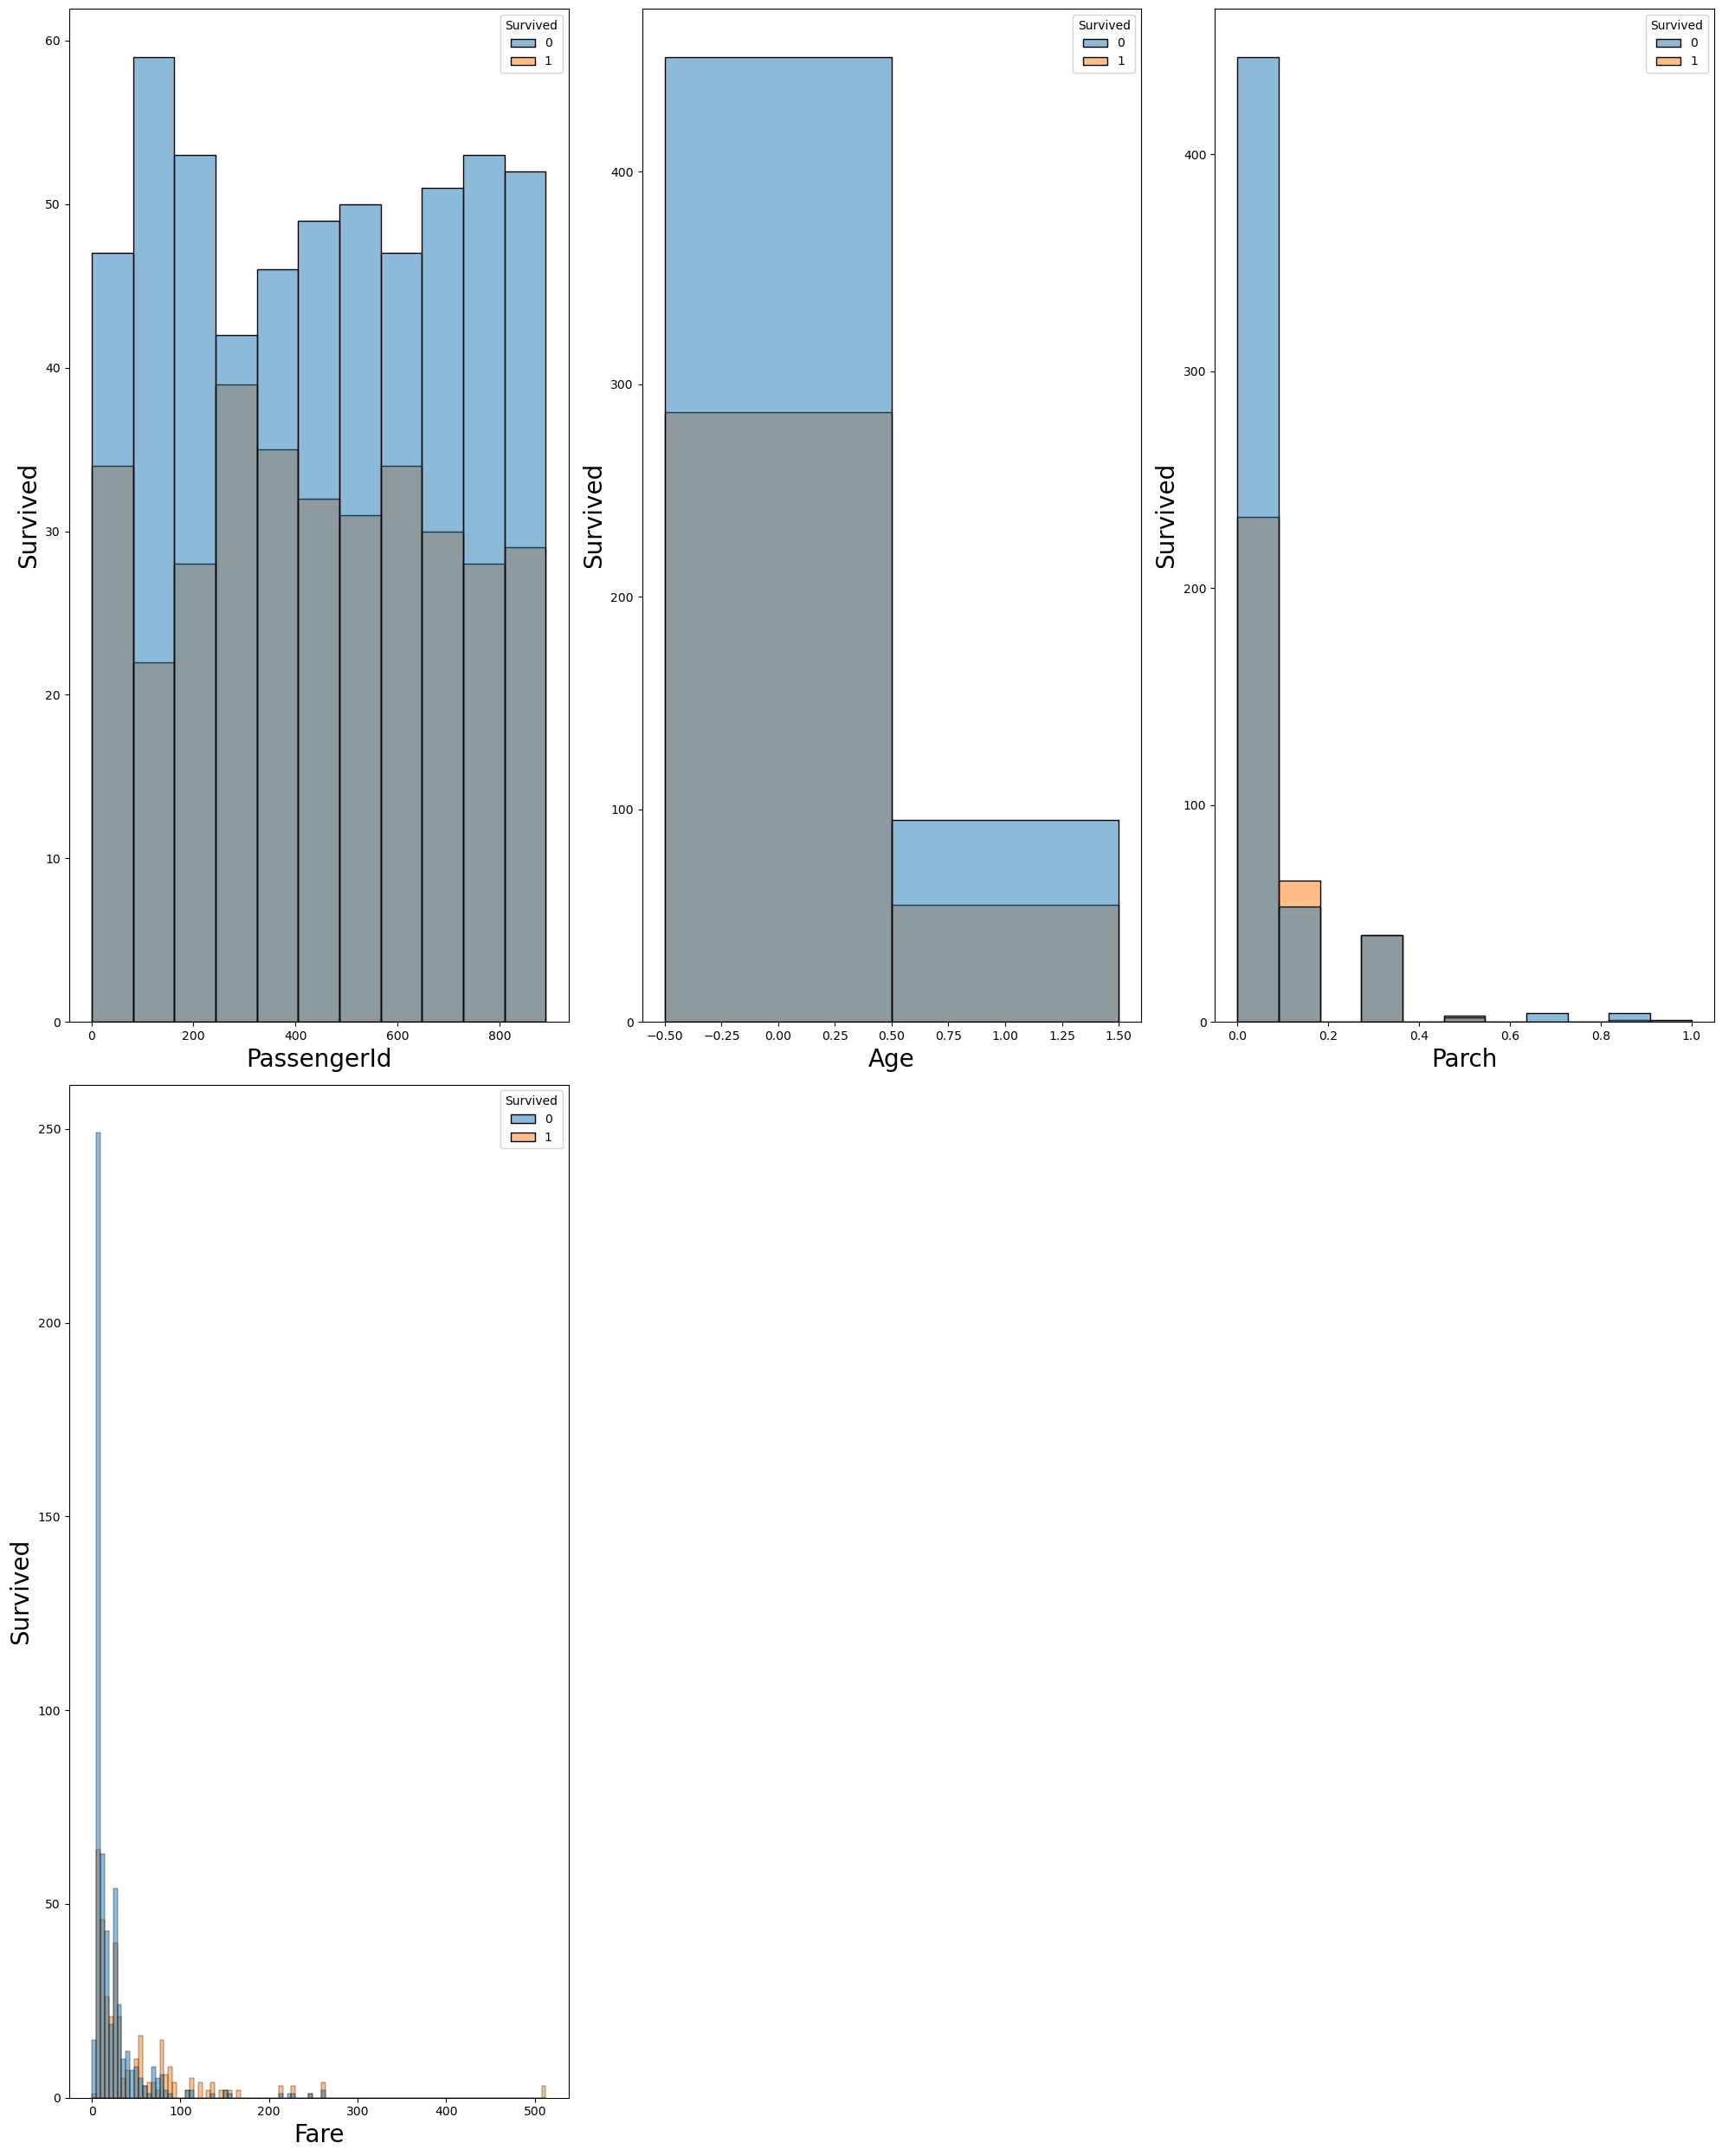

In [105]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the numerical columns
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        sns.histplot(x=data2[column],hue=data['Survived'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

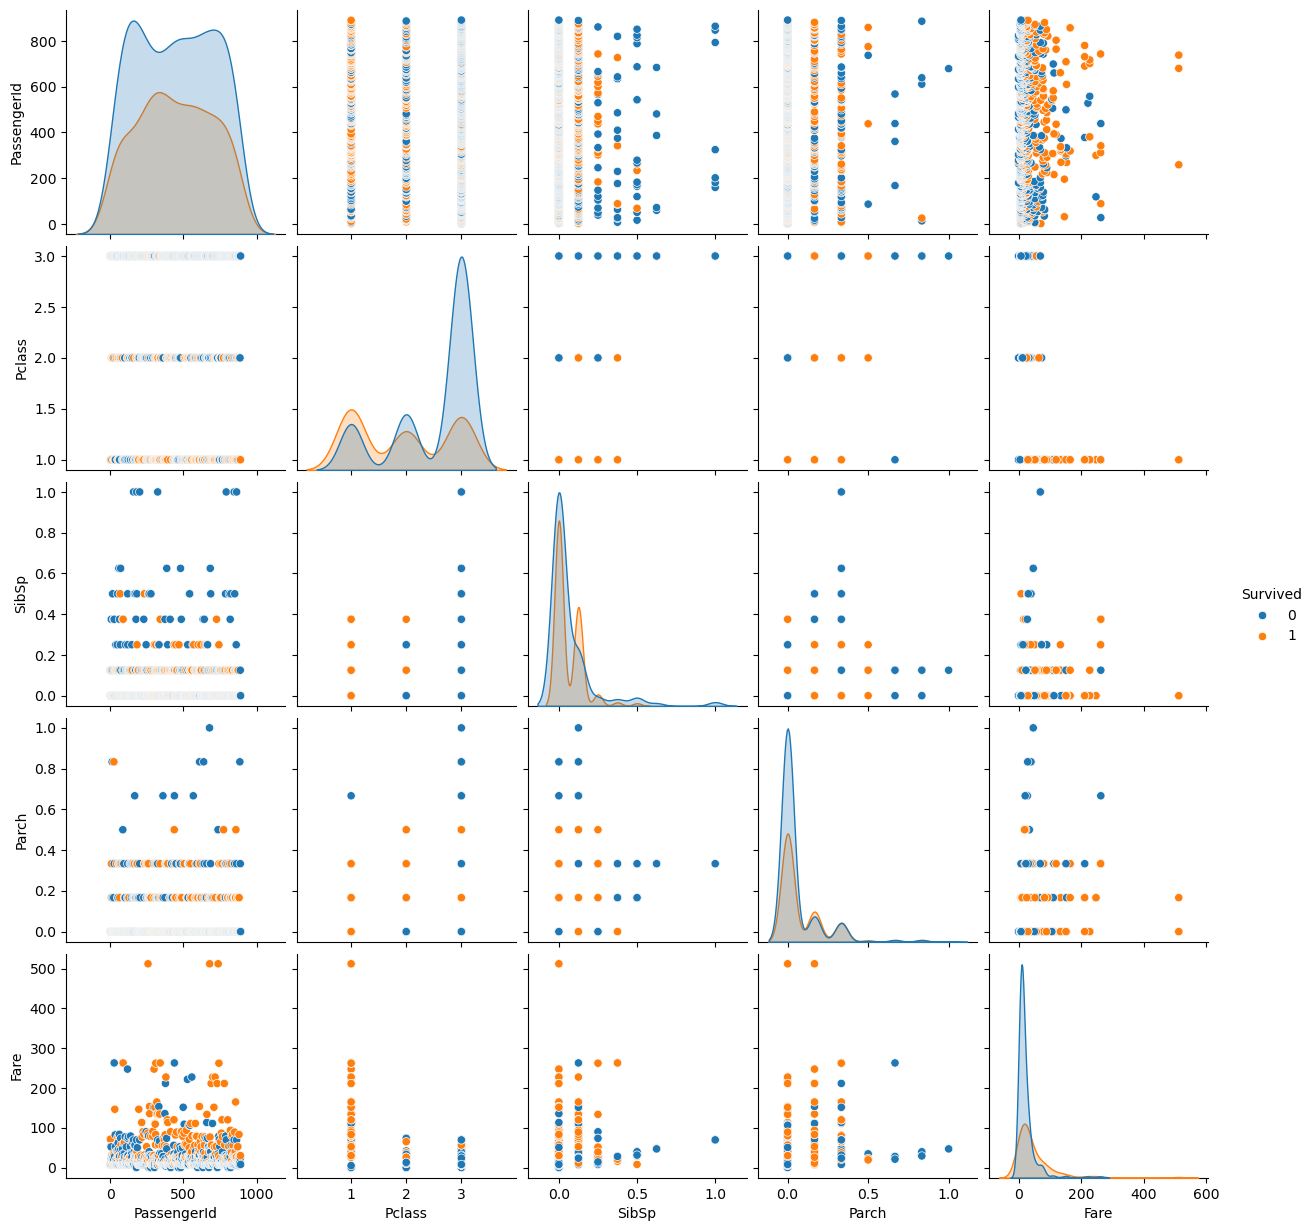

In [106]:
## Multivariate analysis
sns.pairplot(data,hue='Survived')

In [107]:
## Encoding  of Ticket
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn

label = LabelEncoder()#object creation
data.Ticket=label.fit_transform(data.Ticket)#label encoding

In [108]:
df= data.drop(columns=['Ticket'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,7.2500,"B96 ,B98,C23,C25,C27,G6",S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,7.9250,"B96 ,B98,C23,C25,C27,G6",S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,8.0500,"B96 ,B98,C23,C25,C27,G6",S


In [109]:
df = df.drop(['Name', 'Cabin'], axis=1)

In [110]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,0.271174,0.125,0.000000,7.2500,S
1,2,1,1,female,0.472229,0.125,0.000000,71.2833,C
2,3,1,3,female,0.321438,0.000,0.000000,7.9250,S
3,4,1,1,female,0.434531,0.125,0.000000,53.1000,S
4,5,0,3,male,0.434531,0.000,0.000000,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.334004,0.000,0.000000,13.0000,S
887,888,1,1,female,0.233476,0.000,0.000000,30.0000,S
888,889,0,3,female,0.29,0.125,0.333333,23.4500,S
889,890,1,1,male,0.321438,0.000,0.000000,30.0000,C


## Checking correlation

<Axes: >

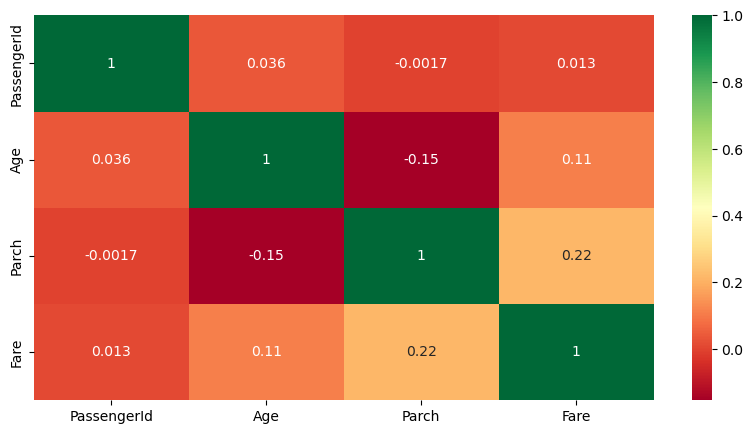

In [112]:
## Checking correlation
plt.figure(figsize=(10, 5))#canvas size
sns.heatmap(data2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})#plotting heat map to check correlation


# Model Creation

In [156]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,0.271174,0.125,0.0,7.2500,S
1,2,1,1,female,0.472229,0.125,0.0,71.2833,C
2,3,1,3,female,0.321438,0.000,0.0,7.9250,S
3,4,1,1,female,0.434531,0.125,0.0,53.1000,S
4,5,0,3,male,0.434531,0.000,0.0,8.0500,S


In [115]:
#Creating independent and dependent variable.
X = df.drop('Survived', axis=1)
y = df['Survived']

In [116]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,0.271174,0.125,0.000000,7.2500,S
1,2,1,female,0.472229,0.125,0.000000,71.2833,C
2,3,3,female,0.321438,0.000,0.000000,7.9250,S
3,4,1,female,0.434531,0.125,0.000000,53.1000,S
4,5,3,male,0.434531,0.000,0.000000,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,0.334004,0.000,0.000000,13.0000,S
887,888,1,female,0.233476,0.000,0.000000,30.0000,S
888,889,3,female,0.29,0.125,0.333333,23.4500,S
889,890,1,male,0.321438,0.000,0.000000,30.0000,C


In [124]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [126]:
# Step 5: Define preprocessing for numerical and categorical features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

In [128]:
# For numerical data, we'll impute missing values with the mean
numeric_transformer = SimpleImputer(strategy='mean')

In [130]:
# For categorical data, we'll use OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [132]:
# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [138]:
#Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [140]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
886    0
751    1
804    1
596    1
231    0
Name: Survived, Length: 179, dtype: int64

In [142]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
248,249,1,male,0.459663,0.125,0.166667,52.5542,S
197,198,3,male,0.522493,0.000,0.166667,8.4042,S
133,134,2,female,0.359135,0.125,0.000000,26.0000,S
169,170,3,male,0.346569,0.000,0.000000,56.4958,S
736,737,3,female,0.597889,0.125,0.500000,34.3750,S
...,...,...,...,...,...,...,...,...
886,887,2,male,0.334004,0.000,0.000000,13.0000,S
751,752,3,male,0.070118,0.000,0.166667,12.4750,S
804,805,3,male,0.334004,0.000,0.000000,6.9750,S
596,597,2,female,0.29,0.000,0.000000,33.0000,S


In [144]:
X_train.shape

(712, 8)

In [146]:
y_train.shape

(712,)

In [162]:
# Step 7: Create a pipeline that first preprocesses the data, then applies logistic regression
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
clf.fit(X_train,y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [168]:
y_pred = clf.predict(X_test)

In [170]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [172]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
886    0
751    1
804    1
596    1
231    0
Name: Survived, Length: 179, dtype: int64

In [174]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [176]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[103  14]
 [ 14  48]]


In [178]:
acc=accuracy_score(y_test,y_pred)
acc

0.8435754189944135

In [180]:
recall=recall_score(y_test,y_pred)
recall

0.7741935483870968

In [182]:
precision=precision_score(y_test,y_pred)
precision

0.7741935483870968

In [184]:
f1score=f1_score(y_test,y_pred)
f1score

0.7741935483870968

In [186]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

